In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/네카라쿠배/머신러닝/주차수요 예측/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/네카라쿠배/머신러닝/주차수요 예측/data/test.csv')
age_gender = pd.read_csv('/content/drive/MyDrive/네카라쿠배/머신러닝/주차수요 예측/data/age_gender_info.csv')

## 1-1. 데이터 오류 삭제


*   1번 오류의 경우 해당 사실을 감안하여 분석을 진행
*   2, 3번 오류의 경우에는 문제가 된 단지들을 트레인셋에서 제외하기를 권장드리고, 테스트셋에서는 평가 시 제외






In [3]:
# 1번 데이터 오류 - 전용면적별 세대수 합계와 총세대수가 일치하지 않는 경우
## 모델 학습 후 삭제 여부 판단
train = train[train.단지코드 != 'C1490']
train = train[train.단지코드 != 'C2497']
train = train[train.단지코드 != 'C2620']
train = train[train.단지코드 != 'C1344']
train = train[train.단지코드 != 'C1024']
train = train[train.단지코드 != 'C2470']
train = train[train.단지코드 != 'C1206']
train = train[train.단지코드 != 'C1740']
train = train[train.단지코드 != 'C2405']
train = train[train.단지코드 != 'C1804']

# 2번 데이터오류 - 동일한 단지에 단지코드가 2개로 부여되어 단지코드 ․ 총세대수 ․ 주차면수 ․ 등록차량대수 등에서 오류 발생
train = train[train.단지코드 != 'C2085']
train = train[train.단지코드 != 'C1397']
train = train[train.단지코드 != 'C2431']
train = train[train.단지코드 != 'C1649']
train = train[train.단지코드 != 'C1036']
train = train[train.단지코드 != 'C2675']

test = test[test.단지코드 != 'C2675']

# 3번 데이터 오류 - 단지코드 등 기입 실수로 단지코드 ․ 총세대수 ․ 주차면수 ․ 등록차량대수 등에서 오류 발생
train = train[train.단지코드 != 'C2335']
train = train[train.단지코드 != 'C1327']
train = train[train.단지코드 != 'C1095']
train = train[train.단지코드 != 'C2051']
train = train[train.단지코드 != 'C1218']
train = train[train.단지코드 != 'C1894']
train = train[train.단지코드 != 'C2483']
train = train[train.단지코드 != 'C1502']
train = train[train.단지코드 != 'C1988']

test = test[test.단지코드 != 'C2335']
test = test[test.단지코드 != 'C1327']

## 1-2. 데이터 탐색

In [4]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0


In [5]:
# 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장에 NULL값 존재
# 임대보증금, 임대료의 데이터 타입을 바꿔야할 거 같음
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2818 non-null   object 
 1   총세대수                          2818 non-null   int64  
 2   임대건물구분                        2818 non-null   object 
 3   지역                            2818 non-null   object 
 4   공급유형                          2818 non-null   object 
 5   전용면적                          2818 non-null   float64
 6   전용면적별세대수                      2818 non-null   int64  
 7   공가수                           2818 non-null   float64
 8   자격유형                          2818 non-null   object 
 9   임대보증금                         2259 non-null   object 
 10  임대료                           2259 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2611 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2818 non-null   float64
 13  단지내

In [6]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [7]:
# 자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영)에 NULL값 존재
# 임대보증금, 임대료의 데이터 타입을 바꿔야할 거 같음
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1008 non-null   object 
 1   총세대수                          1008 non-null   int64  
 2   임대건물구분                        1008 non-null   object 
 3   지역                            1008 non-null   object 
 4   공급유형                          1008 non-null   object 
 5   전용면적                          1008 non-null   float64
 6   전용면적별세대수                      1008 non-null   int64  
 7   공가수                           1008 non-null   float64
 8   자격유형                          1006 non-null   object 
 9   임대보증금                         828 non-null    object 
 10  임대료                           828 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  970 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1008 non-null   float64
 13  단지내

In [8]:
# 대체로 train과 test의 평균, 표준편차 값은 비슷하다. 단지내주차면수가 조금 차이가 난다.
display(train.describe().T)
display(test.describe().T)

,count,mean,std,min,25%,50%,75%,max
총세대수,2818.0,891.193400,521.339747,26.00,511.25,781.00,1106.00,2568.0
전용면적,2818.0,44.013112,32.073840,12.62,32.10,39.84,49.70,583.4
전용면적별세대수,2818.0,103.135912,133.882695,1.00,14.25,60.00,143.75,1865.0
공가수,2818.0,12.984741,10.649586,0.00,4.00,11.00,20.00,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2611.0,0.184221,0.435226,0.00,0.00,0.00,0.00,3.0
도보 10분거리 내 버스정류장 수,2818.0,3.704400,2.692419,0.00,2.00,3.00,4.00,20.0
단지내주차면수,2818.0,591.328247,392.148022,13.00,277.00,496.00,809.00,1798.0
등록차량수,2818.0,545.908446,428.334603,13.00,209.00,465.00,751.00,2550.0


,count,mean,std,min,25%,50%,75%,max
총세대수,1008.0,869.378968,535.908018,75.00,492.50,754.00,1161.00,2572.0
전용면적,1008.0,43.788462,36.105647,9.96,33.15,39.72,47.41,583.4
전용면적별세대수,1008.0,101.093254,126.674450,1.00,14.00,60.00,140.00,1341.0
공가수,1008.0,15.630952,11.116013,0.00,6.00,16.00,23.00,45.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),970.0,0.138144,0.437519,0.00,0.00,0.00,0.00,2.0
도보 10분거리 내 버스정류장 수,1008.0,4.597222,5.391566,1.00,2.00,3.00,5.00,50.0
단지내주차면수,1008.0,546.678571,341.278739,29.00,286.00,458.00,706.50,1696.0


## 1-3. 데이터 전처리 (중복 제거, 결측치&이상치 제거, 데이터 타입 변경 등)

train, test 중복 제거

In [9]:
# 중복을 조회해보니 중복 데이터가 존재, 중복 제거
print("중복 제거 전 : ",train.shape, train.drop_duplicates().shape)
train = train.drop_duplicates()
print("중복 제거 후 : ",train.shape, train.drop_duplicates().shape)

중복 제거 전 :  (2818, 15) (2505, 15)
중복 제거 후 :  (2505, 15) (2505, 15)


In [10]:
# 중복을 조회해보니 중복 데이터가 존재, 중복 제거
print("중복 제거 전 : ",test.shape, test.drop_duplicates().shape)
test = test.drop_duplicates()
print("중복 제거 후 : ",test.shape, test.drop_duplicates().shape)

중복 제거 전 :  (1008, 14) (936, 14)
중복 제거 후 :  (936, 14) (936, 14)


결측치 제거

train => 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장

test => 자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영)

임대보증금 / 임대료

nan => 공급유형이 '공공분양', '임대상가'인 경우 임대보증금, 임대료가 없음

'-'값은 => 지역, 세대수, 전용면적, 전용면적별세대수 정보를 바탕으로 실제 임대 모집 공고와 비교를 통해 결측치 대체

동일 전용면적 아래 공급대상 유형이 구분되어 있는 경우, 전용면적별 평균값으로 대체

공급유형이 장기전세인 경우 임대료를 0으로 대체


In [11]:
# train 임대보증금에 nan, - 값이 존재
print("train 임대보증금 : ",train.임대보증금.unique())

# train 임대료에 nan, - 값이 존재
print("train 임대료 : ",train.임대료.unique())

# test 임대보증금에 nan, - 값이 존재
print("test 임대보증금 : ",test.임대보증금.unique())

# test 임대료에 nan, - 값이 존재
print("test 임대료 : ",test.임대료.unique())

train 임대보증금 :  ['9216000' '12672000' '18433000' '23042000' '15620000' '27637000'
 '36048000' '42056000' '15607000' '23139000' '29209000' '12015000'
 '21628000' '25233000' '29551000' '43990000' '49854000' '17730000'
 '23641000' '35462000' '41372000' '10813000' '16821000' '32443000'
 '15271000' '15407000' '17687000' '9714000' '10244000' '11807000'
 '8052000' '9174000' nan '19436000' '28252000' '17460000' '19954000'
 '28687000' '3141000' '3731000' '11492000' '14215000' '14292000' '3138000'
 '3631000' '13930000' '17568000' '14247000' '20173000' '21203000'
 '22307000' '27885000' '5787000' '6873000' '11574000' '13155000'
 '17389000' '17405000' '17423000' '19975000' '54040000' '8625000'
 '8710000' '8848000' '16852000' '22471000' '28714000' '34956000'
 '10043000' '13101000' '7744000' '8813000' '11620000' '14418000' '8133000'
 '9261000' '12483000' '19973000' '23720000' '11234000' '14981000'
 '18726000' '24343000' '10363000' '10060000' '8083000' '9670000' '9363000'
 '10692000' '13554000' '129530

In [12]:
print("train 임대보증금 nan :",train[train.임대보증금.isnull()].공급유형.unique())
print("train 임대료 nan :",train[train.임대료.isnull()].공급유형.unique())

train 임대보증금 nan : ['임대상가' '공공분양']
train 임대료 nan : ['임대상가' '공공분양']


In [13]:
# 임대상가, 공공분양의 임대보증금, 임대료를 0으로 대체

# 임대보증금 처리
train.loc[train['공급유형'] == '임대상가', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '공공분양', '임대보증금'] = train['임대보증금'].fillna(0)

# 임대료 처리 
train.loc[train['공급유형'] == '임대상가', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '공공분양', '임대료'] = train['임대료'].fillna(0)

In [14]:
# train 임대보증금 -
train[train.임대보증금 == '-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


In [15]:
# train 임대료 -
train[train.임대료 == '-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000,-,0.0,3.0,673.0,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0


[Train] C1786 | 강원도 | 행복주택 | 총 480세대 : 춘천거두2 행복주택
춘천거두2 행복주택 임대조건 : https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=1425

In [16]:
# 전용면적 16.91 
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 16.91), '임대보증금'] = 13450000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 16.91), '임대료'] = 65500
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 19700000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 96000
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 19150000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 94000
# 전용면적 26.9
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대보증금'] = 21400000
train.loc[(train['단지코드'] == 'C1786') & (train['전용면적'] == 26.9), '임대료'] = 105000

[Train] C1326 | 부산광역시 | 국민임대 | 총 1934세대 : 부산정관 7단지 A-1블록
부산정관 7단지 A-1BL 국민임대 모집공고 : https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=915"

In [17]:
# 전용면적 24.72
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.72), '임대보증금'] = 7000000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.72), '임대료'] = 135000
# 전용면적 24.79
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.79), '임대보증금'] = 7000000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 24.79), '임대료'] = 135000
# 전용면적 26.83
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 26.83), '임대보증금'] = 7600000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 26.83), '임대료'] = 142000
# 전용면적 37.7
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 37.7), '임대보증금'] = 14800000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 37.7), '임대료'] = 198000
# 전용면적 46.94
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 46.94), '임대보증금'] = 23100000
train.loc[(train['단지코드'] == 'C1326') & (train['전용면적'] == 46.94), '임대료'] = 259000

[Train] C2186 | 대구광역시 | 국민임대 | 총 924세대 : 대구연경 A-2블록 국민임대주택
대구연경 A-2블록 국민임대주택 입주자모집 안내 : https://m.blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=sugar9025404&logNo=221577519654&categoryNo=59&proxyReferer=

In [18]:
# 전용면적 29.17
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.17), '임대료'] = 138600
# 전용면적 29.34
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대보증금'] = 10847000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 29.34), '임대료'] = 138600
# 전용면적 37.43
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대보증금'] = 17338000
train.loc[(train['단지코드'] == 'C2186') & (train['전용면적'] == 37.43), '임대료'] = 197500

In [19]:
# 공급유형이 장기전세인 경우 임대료가 0으로 대체
train.loc[(train['공급유형'] == '장기전세'), '임대료'] = 0

In [20]:
train[(train.임대보증금 == '-') | (train.임대료 == '-') | (train.임대보증금.isnull()) | (train.임대료.isnull()) ]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [21]:
print("test 임대보증금 nan :",test[test.임대보증금.isnull()].공급유형.unique())
print("test 임대료 nan :",test[test.임대료.isnull()].공급유형.unique())

test 임대보증금 nan : ['영구임대' '임대상가']
test 임대료 nan : ['영구임대' '임대상가']


In [22]:
# 임대상가의 임대보증금, 임대료를 0으로 대체

# 임대보증금 처리
test.loc[test['공급유형'] == '임대상가', '임대보증금'] = test['임대보증금'].fillna(0)

# 임대료 처리 
test.loc[test['공급유형'] == '임대상가', '임대료'] = test['임대료'].fillna(0)

In [23]:
# test 임대보증금 -
test[test.임대보증금 == '-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,-,-,0.0,1.0,40.0
1006,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,-,-,0.0,1.0,40.0
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,-,-,0.0,1.0,467.0
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,-,-,0.0,1.0,467.0
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,-,-,0.0,1.0,467.0
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0


In [24]:
# test 임대료 -
test[test.임대료 == '-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
1005,C2152,120,아파트,강원도,영구임대,24.83,66,9.0,C,-,-,0.0,1.0,40.0
1006,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,-,-,0.0,1.0,40.0
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,-,-,0.0,1.0,467.0
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,-,-,0.0,1.0,467.0
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,-,-,0.0,1.0,467.0
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0


In [25]:
test[test.임대보증금== "-"].단지코드.unique()

array(['C2152', 'C1267'], dtype=object)

In [26]:
test[test.임대료== "-"].단지코드.unique()

array(['C2152', 'C1267'], dtype=object)

[Test] C2152 | 강원도 | 영구임대 | 총 120세대 : 화천신읍 공공실버주택
화천신읍 공공실버주택 예비입주자 모집 : https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=9070

In [27]:
# 전용면적 24.83
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대보증금'] = 2129000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 24.83), '임대료'] = 42350
# 전용면적 33.84
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대보증금'] = 2902000
test.loc[(test['단지코드'] == 'C2152') & (test['전용면적'] == 33.84), '임대료'] = 57730

[Test] C1267 | 경상남도 | 행복주택 | 총 675세대 : 창원가포 A-1블록 행복주택
창원가포 A-1블록 행복주택 입주자 모집공고 : https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=6373

In [28]:
# 전용면적 16.94
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대보증금'] = 11200000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 16.94), '임대료'] = 53200
# 전용면적 26.85
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 16333330
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 77580
# 전용면적 26.85
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대보증금'] = 18620000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 26.85), '임대료'] = 88440
# 전용면적 36.77
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대보증금'] = 23760000
test.loc[(test['단지코드'] == 'C1267') & (test['전용면적'] == 36.77), '임대료'] = 112860

[Test] C1006 | 대전광역시 | 임대상가 | 총 1505세대 : 대전둔산1단지
일부 '영구임대' 아파트 입주 자격유형이 D로 되어있음 → C로 변경

영구임대 : 총 1491 세대

전용면적 26.37 : 1193 세대 (테스트 데이터상 총 1181세대 - 12세대 부족함)
전용면적 31.32 : 298 세대
전용면적 52.74 (세대통합형) : (테스트 데이터상 6세대. 실제인지는 확인하지 못함)
임대상가 : 총 20 호

대전둔산1단지 임대상가 입점자 모집공고 : https://apply.lh.or.kr/LH/index.html?gv_url=SIL::CLCC_SIL_1080.xfdl&gv_menuId=1010205&gv_param=CCR_CNNT_SYS_DS_CD:04,PAN_ID:LN-0001525,LCC:Y#MN::CLCC_MN_0010:

대전둔산1 영구임대주택 그린리모델링세대 입주자 자격완화 모집 : https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=8399

In [29]:
# 전용면적 26.37
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대보증금'] = 5787000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '임대료'] = 79980
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 26.37), '자격유형'] = 'C'
# 전용면적 52.74
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대보증금'] = 11574000
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '임대료'] = 159960
test.loc[(test['단지코드'] == 'C1006') & (test['전용면적'] == 52.74), '자격유형'] = 'C'

In [30]:
test[(test.임대보증금 == '-') | (test.임대료 == '-') | (test.임대보증금.isnull()) | (test.임대료.isnull()) ]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수


train, test 데이터의 임대보증금, 임대료 데이터 타입 변경

object => float 

In [31]:
train['임대보증금'] = train['임대보증금'].astype(float)
train['임대료'] = train['임대료'].astype(float)

test['임대보증금'] = test['임대보증금'].astype(float)
test['임대료'] = test['임대료'].astype(float)

### 도보 10분거리 내 버스정류장 수 / 도보 10분거리 내 지하철역 수(환승노선 수 반영)

https://m.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcView.do#mapPage?pblancId=9543&houseSn=1 에서 얻은 정보를 바탕으로 결측치 해결

In [32]:
train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(5)

In [33]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)']=train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

In [34]:
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)']=test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
test.loc[(test['단지코드'] == 'C1472'), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = 1

In [35]:
# 도보 10분거리 내 버스정류장 수가 50일수는 없다고 판단하여 mean값으로 대체
test['도보 10분거리 내 버스정류장 수'].unique()
test.loc[test['도보 10분거리 내 버스정류장 수'] == 50, '도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].mean()

In [36]:
# train, test 데이터의 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 지하철역 수(환승노선 수 반영) nan 값을 0으로 채움
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(0)

test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

### 자격유형 결측치 제거

In [37]:
# 자격 유형 nan 처리
test[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [38]:
# 같은 단지의 자격유형이 모두 A이기때문에 A로 채움
test[test['단지코드']=='C2411']
test.loc[test['단지코드'].isin(['C2411']) & test['자격유형'].isnull(), '자격유형'] = 'A'

In [39]:
# 같은 단지의 영구임대 유형이 모두 C이므로 C로 채움
test.loc[test['단지코드'].isin(['C2253']) & test['자격유형'].isnull(), '자격유형'] = 'C'

# 1-4. Feature 특징 파악

In [40]:
# 등록차량수와의 상관관계 파악
train.corr()['등록차량수'].sort_values()

도보 10분거리 내 지하철역 수(환승노선 수 반영)   -0.055275
전용면적                            0.061098
공가수                             0.102805
도보 10분거리 내 버스정류장 수              0.122607
전용면적별세대수                        0.200057
임대보증금                           0.357583
총세대수                            0.444203
임대료                             0.488183
단지내주차면수                         0.849953
등록차량수                           1.000000
Name: 등록차량수, dtype: float64

In [41]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

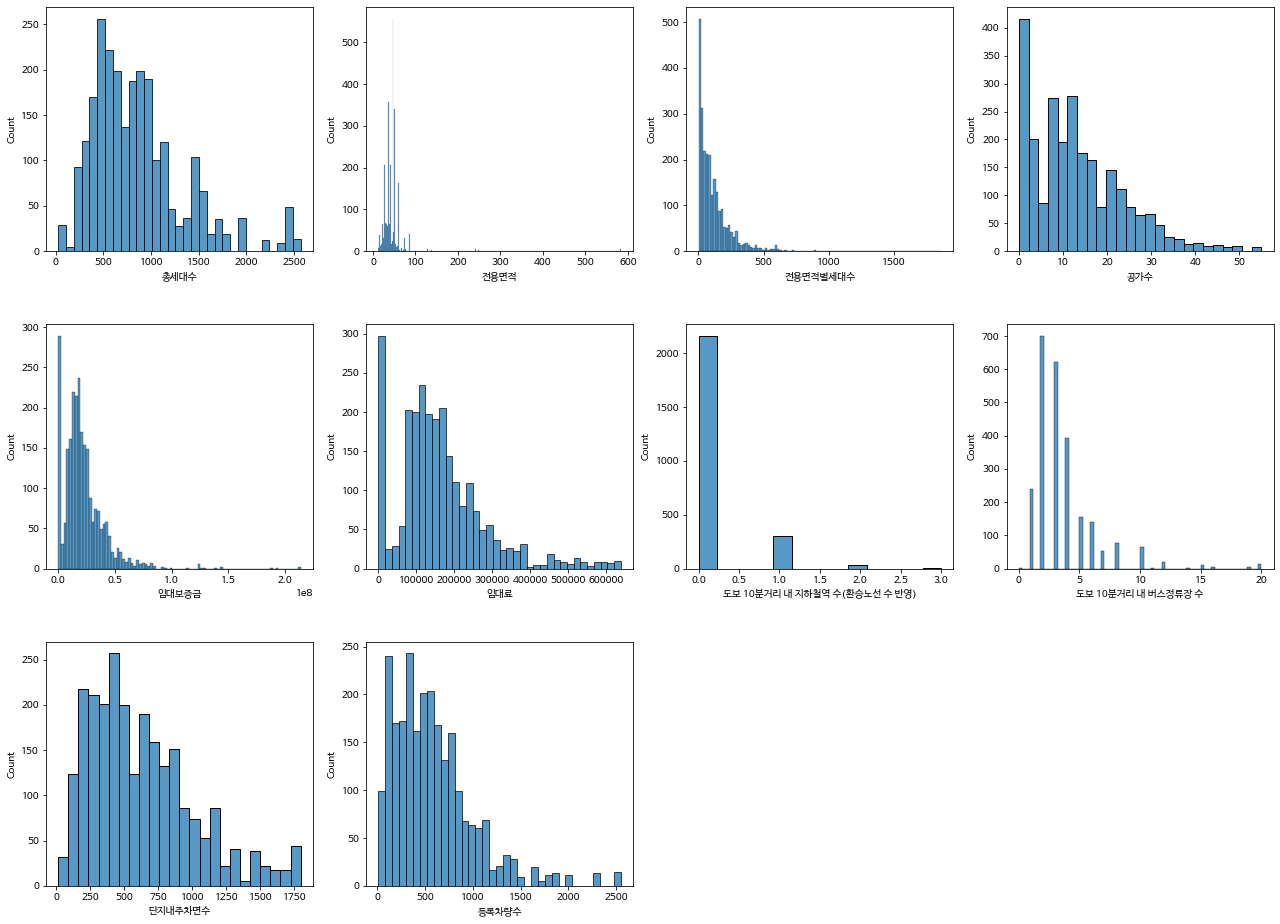

In [42]:
# 변수별 분포 확인

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

plt.rc('font', family='NanumBarunGothic') 

numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)

fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train[n])

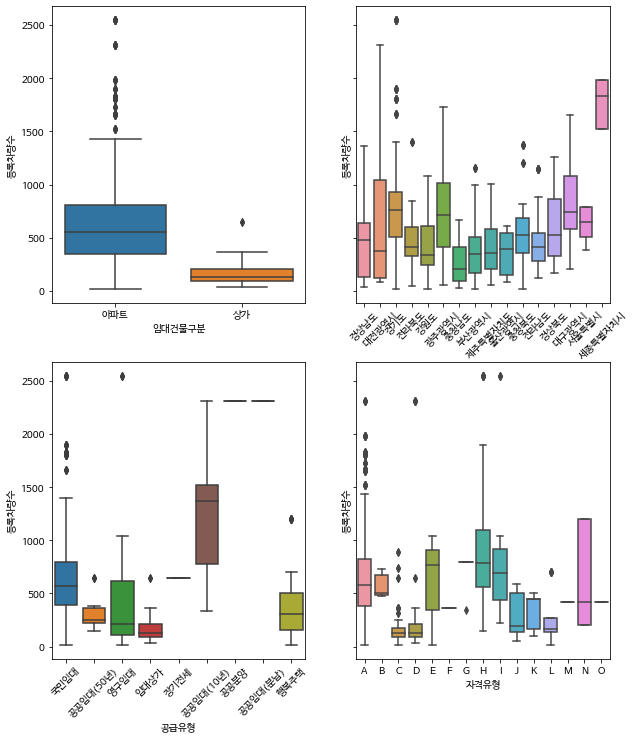

In [43]:
# 변수들의 등록차량수 변수에 대한 boxplot
fig, axes = plt.subplots(2,2, figsize=(10,12), sharey=True)

sns.boxplot(ax=axes[0,0], x='임대건물구분', y='등록차량수', data=train);
sns.boxplot(ax=axes[0,1], x='지역', y='등록차량수', data=train);
sns.boxplot(ax=axes[1,0], x='공급유형', y='등록차량수', data=train);
sns.boxplot(ax=axes[1,1], x='자격유형', y='등록차량수', data=train);

axes[0,1].tick_params(axis='x', labelrotation=45);
axes[1,0].tick_params(axis='x', labelrotation=45);

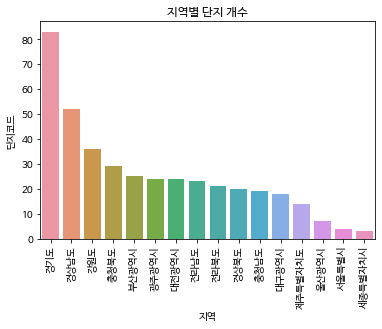

In [44]:
sns.barplot(data=train.groupby(['지역']).nunique().sort_values(by=['단지코드'], ascending=False),
            x=train.groupby(['지역']).nunique().sort_values(by=['단지코드'], ascending=False).index, y='단지코드')
plt.xticks(rotation=90)
plt.title('지역별 단지 개수')
plt.show()

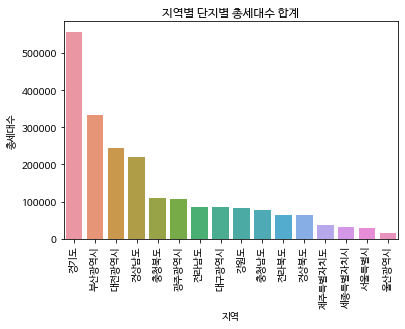

In [45]:
sns.barplot(data=train.groupby(['지역']).sum().sort_values(by=['총세대수'], ascending=False),
            x=train.groupby(['지역']).sum().sort_values(by=['총세대수'], ascending=False).index, y='총세대수')
plt.xticks(rotation=90)
plt.title('지역별 단지별 총세대수 합계')
plt.show()

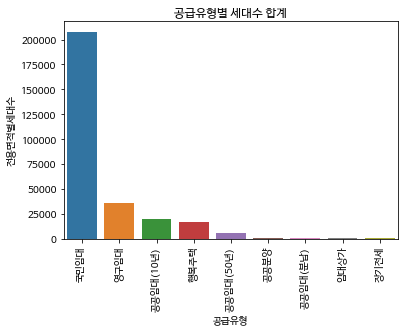

In [46]:
sns.barplot(data=train.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=train.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.xticks(rotation=90)
plt.title('공급유형별 세대수 합계')
plt.show()

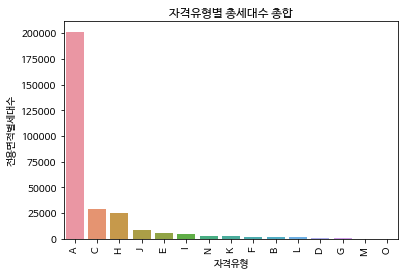

In [47]:
sns.barplot(data=train.groupby(['자격유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=train.groupby(['자격유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.title('자격유형별 총세대수 총합')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, '지역별 도보 10분거리 내 지하철역 수의 평균')

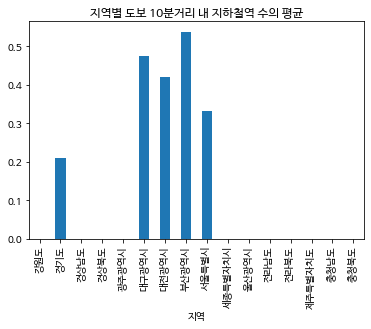

In [48]:
train.groupby(['지역'])['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean().plot(kind='bar')
plt.title('지역별 도보 10분거리 내 지하철역 수의 평균')

Text(0.5, 1.0, '지역별 도보 10분거리 내 버스정류장 수의 평균')

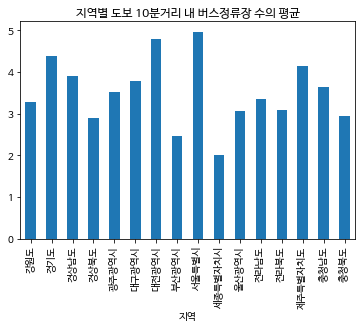

In [49]:
train.groupby(['지역'])['도보 10분거리 내 버스정류장 수'].mean().plot(kind='bar')
plt.title('지역별 도보 10분거리 내 버스정류장 수의 평균')

In [50]:
# 총세대수가 증가함에따라 등록차량수도 증가함
fig = px.scatter(
    train, x='총세대수', y='등록차량수', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', marginal_x='histogram', marginal_y='histogram'
)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [51]:
# 공가수가 증가, 등록차량수 증가
fig = px.scatter(
    train, x='공가수', y='등록차량수', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue',
    marginal_x='histogram', marginal_y='histogram'
)
fig.show()

# 1-5. Encoder & Scaler
- 하나의 단지코드에 대해 둘 이상의 항목이 존재하는 컬럼

'공급유형', '자격유형', '임대건물구분', '임대료', '임대보증금', '전용면적', '전용면적별세대수'

- 하나의 단지코드에 대해 하나의 항목만이 존재하는 컬럼 

'공가수', '단지내주차면수', '도보 10분거리 내 버스정류장 수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '미성년자 비율', '지역', '총세대수', '등록차량수'

In [52]:
train.pivot_table(index='단지코드',aggfunc='nunique')

,공가수,공급유형,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),등록차량수,임대건물구분,임대료,임대보증금,자격유형,전용면적,전용면적별세대수,지역,총세대수
단지코드,,,,,,,,,,,,,,
C1000,1,1,1,1,1,1,1,3,3,1,5,6,1,1
C1004,1,2,1,1,1,1,2,3,3,2,15,3,1,1
C1005,1,1,1,1,1,1,1,3,3,1,3,3,1,1
C1013,1,1,1,1,1,1,1,3,3,1,4,5,1,1
C1014,1,1,1,1,1,1,1,4,4,1,6,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,1,1,1,1,1,1,1,4,4,1,5,6,1,1
C2666,1,1,1,1,1,1,1,2,2,1,4,6,1,1
C2670,1,1,1,1,1,1,1,3,3,1,4,3,1,1


In [53]:
train.pivot_table(index='단지코드',aggfunc='nunique').sum()

공가수                              402
공급유형                             464
단지내주차면수                          402
도보 10분거리 내 버스정류장 수               402
도보 10분거리 내 지하철역 수(환승노선 수 반영)     402
등록차량수                            402
임대건물구분                           434
임대료                             1224
임대보증금                           1209
자격유형                             488
전용면적                            1795
전용면적별세대수                        2114
지역                               402
총세대수                             402
dtype: int64

In [54]:
unique_cols = ['공가수', '단지내주차면수', '도보 10분거리 내 버스정류장 수',
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '지역', '총세대수']

train_agg = train.set_index('단지코드')[unique_cols+['등록차량수']].drop_duplicates()
train_agg

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),지역,총세대수,등록차량수
단지코드,,,,,,,
C2515,17.0,624.0,3.0,0.0,경상남도,545,205.0
C1407,13.0,1285.0,1.0,1.0,대전광역시,1216,1064.0
C1945,6.0,734.0,3.0,1.0,경기도,755,730.0
C1470,14.0,645.0,2.0,0.0,전라북도,696,553.0
C1898,9.0,517.0,6.0,0.0,전라북도,566,415.0
...,...,...,...,...,...,...,...
C2586,7.0,66.0,3.0,0.0,제주특별자치도,90,57.0
C2035,24.0,521.0,1.0,0.0,강원도,492,246.0
C2020,7.0,25.0,2.0,1.0,부산광역시,40,19.0


In [55]:
test_agg = test.set_index('단지코드')[unique_cols].drop_duplicates() 
test_agg

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),지역,총세대수
단지코드,,,,,,
C1072,14.0,683.0,2.0,0.0,경기도,754
C1128,9.0,1216.0,3.0,0.0,경기도,1354
C1456,18.0,547.0,16.0,0.0,부산광역시,619
C1840,7.0,543.0,3.0,0.0,전라북도,593
C1332,11.0,1112.0,2.0,0.0,경기도,1297
...,...,...,...,...,...,...
C2456,17.0,270.0,4.0,0.0,제주특별자치도,349
C1266,35.0,593.0,1.0,0.0,충청북도,596
C2152,9.0,40.0,1.0,0.0,강원도,120


In [56]:
train_agg = pd.get_dummies(train_agg,'지역')
train_agg

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),총세대수,등록차량수,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도
단지코드,,,,,,,,,,,,,,,,,,,,,,
C2515,17.0,624.0,3.0,0.0,545,205.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
C1407,13.0,1285.0,1.0,1.0,1216,1064.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
C1945,6.0,734.0,3.0,1.0,755,730.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C1470,14.0,645.0,2.0,0.0,696,553.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
C1898,9.0,517.0,6.0,0.0,566,415.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2586,7.0,66.0,3.0,0.0,90,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
C2035,24.0,521.0,1.0,0.0,492,246.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C2020,7.0,25.0,2.0,1.0,40,19.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
test_agg = pd.get_dummies(test_agg,'지역')
test_agg

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),총세대수,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도
단지코드,,,,,,,,,,,,,,,,,,,,
C1072,14.0,683.0,2.0,0.0,754,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
C1128,9.0,1216.0,3.0,0.0,1354,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
C1456,18.0,547.0,16.0,0.0,619,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
C1840,7.0,543.0,3.0,0.0,593,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
C1332,11.0,1112.0,2.0,0.0,1297,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2456,17.0,270.0,4.0,0.0,349,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
C1266,35.0,593.0,1.0,0.0,596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
C2152,9.0,40.0,1.0,0.0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
train_mean = train.pivot_table(index='단지코드',aggfunc='mean')
test_mean = test.pivot_table(index='단지코드',aggfunc='mean')
train_mean

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),등록차량수,임대료,임대보증금,전용면적,전용면적별세대수,총세대수
단지코드,,,,,,,,,,
C1000,10.0,438.0,1.0,0.0,481.0,121064.285714,1.320357e+07,45.218571,80.857143,566
C1004,3.0,153.0,2.0,0.0,93.0,13959.333333,6.273333e+05,43.480667,34.466667,521
C1005,16.0,950.0,8.0,0.0,376.0,222046.666667,1.710767e+07,54.360000,381.333333,1144
C1013,16.0,1119.0,6.0,0.0,1665.0,134726.000000,2.492480e+07,46.142000,261.600000,1308
C1014,5.0,823.0,2.0,0.0,708.0,160488.571429,2.389400e+07,49.232857,142.285714,996
...,...,...,...,...,...,...,...,...,...,...
C2663,14.0,700.0,3.0,0.0,652.0,269070.000000,3.025867e+07,41.005000,128.666667,772
C2666,23.0,837.0,1.0,0.0,701.0,133145.000000,1.889050e+07,43.258333,180.666667,1084
C2670,9.0,600.0,2.0,0.0,435.0,115188.000000,1.635000e+07,40.918000,129.600000,648


In [59]:
cols = ['임대료', '임대보증금', '전용면적별세대수']

train_agg[cols] = train_mean[cols]
train_agg.head()

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),총세대수,등록차량수,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도,임대료,임대보증금,전용면적별세대수
단지코드,,,,,,,,,,,,,,,,,,,,,,,,,
C2515,17.0,624.0,3.0,0.0,545,205.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,139557.142857,1.678714e+07,77.857143
C1407,13.0,1285.0,1.0,1.0,1216,1064.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,165956.250000,2.598438e+07,114.250000
C1945,6.0,734.0,3.0,1.0,755,730.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200914.000000,2.406060e+07,127.000000
C1470,14.0,645.0,2.0,0.0,696,553.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,120150.000000,1.772275e+07,174.000000
C1898,9.0,517.0,6.0,0.0,566,415.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,119148.333333,1.742233e+07,94.333333


In [60]:
test_agg[cols] = test_mean[cols]
test_agg.head()

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),총세대수,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도,임대료,임대보증금,전용면적별세대수
단지코드,,,,,,,,,,,,,,,,,,,,,,,
C1072,14.0,683.0,2.0,0.0,754,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,265843.750000,38120250.0,94.250000
C1128,9.0,1216.0,3.0,0.0,1354,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,245516.666667,34125000.0,150.444444
C1456,18.0,547.0,16.0,0.0,619,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,222290.000000,33704875.0,66.625000
C1840,7.0,543.0,3.0,0.0,593,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,123150.000000,18924250.0,148.250000
C1332,11.0,1112.0,2.0,0.0,1297,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,292880.000000,41334500.0,162.125000


In [61]:
test_agg[cols] = np.log1p(test_agg[cols])
train_agg[cols] = np.log1p(train_agg[cols])

In [62]:
# 기존 전용면적 값은 648개가 존재
train['전용면적'].value_counts()

46.90     196
51.93     118
26.37      42
39.72      40
59.88      33
         ... 
12.62       1
39.86       1
109.11      1
74.89       1
59.31       1
Name: 전용면적, Length: 648, dtype: int64

In [63]:
# 기존 전용면적 값을int로 변환하여 64개로 줄임
train['전용면적'].astype(int).value_counts()

46     560
36     346
51     334
39     208
26     188
      ... 
407      1
404      1
48       1
82       1
12       1
Name: 전용면적, Length: 64, dtype: int64

In [64]:
train['전용면적'] = train['전용면적'].astype(int)
test['전용면적'] = test['전용면적'].astype(int)

In [65]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

In [66]:
def reshape_cat_features_float(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+str(col) for col in res.columns})
    return res

In [67]:
reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter')

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1000,0.0,1.0
C1004,1.0,1.0
C1005,0.0,1.0
C1013,0.0,1.0
C1014,0.0,1.0
...,...,...
C2663,0.0,1.0
C2666,0.0,1.0
C2670,0.0,1.0


In [68]:
train['공급_자격'] = train.apply(lambda r : r['공급유형'] + '_' +r['자격유형'], axis=1)
test['공급_자격'] = test.apply(lambda r : r['공급유형'] + '_' +r['자격유형'], axis=1)

In [69]:
reshape_cat_features(data=train, cast_col= '공급_자격', value_col='counter')

,공급_자격_공공분양_D,공급_자격_공공임대(10년)_A,공급_자격_공공임대(50년)_A,공급_자격_공공임대(분납)_A,공급_자격_국민임대_A,공급_자격_국민임대_B,공급_자격_국민임대_E,공급_자격_국민임대_G,공급_자격_국민임대_H,공급_자격_영구임대_A,공급_자격_영구임대_C,공급_자격_영구임대_E,공급_자격_영구임대_F,공급_자격_영구임대_I,공급_자격_임대상가_D,공급_자격_장기전세_A,공급_자격_행복주택_J,공급_자격_행복주택_K,공급_자격_행복주택_L,공급_자격_행복주택_M,공급_자격_행복주택_N,공급_자격_행복주택_O
단지코드,,,,,,,,,,,,,,,,,,,,,,
C1000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1014,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2666,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2670,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
reshape_cat_features_float(data=train, cast_col= '전용면적', value_col='counter')

,전용면적_12,전용면적_14,전용면적_15,전용면적_16,전용면적_17,전용면적_18,전용면적_19,전용면적_20,전용면적_21,전용면적_22,전용면적_23,전용면적_24,전용면적_25,전용면적_26,전용면적_27,전용면적_28,전용면적_29,전용면적_30,전용면적_31,전용면적_32,전용면적_33,전용면적_34,전용면적_35,전용면적_36,전용면적_37,전용면적_38,전용면적_39,전용면적_40,전용면적_41,전용면적_42,전용면적_43,전용면적_44,전용면적_45,전용면적_46,전용면적_47,전용면적_48,전용면적_49,전용면적_50,전용면적_51,전용면적_52,전용면적_53,전용면적_54,전용면적_55,전용면적_57,전용면적_59,전용면적_61,전용면적_63,전용면적_66,전용면적_67,전용면적_72,전용면적_74,전용면적_75,전용면적_82,전용면적_84,전용면적_109,전용면적_126,전용면적_137,전용면적_240,전용면적_248,전용면적_317,전용면적_401,전용면적_404,전용면적_407,전용면적_583
단지코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1004,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
C1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
train_agg = pd.concat([train_agg,
                       reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=train, cast_col= '공급_자격', value_col='counter'),
                       reshape_cat_features_float(data=train, cast_col= '전용면적', value_col='counter')
                      ], axis=1)

test_agg = pd.concat([test_agg,
                       reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=test, cast_col= '공급_자격', value_col='counter'),
                      reshape_cat_features_float(data=test, cast_col= '전용면적', value_col='counter')
                      ], axis=1)

In [72]:
train_agg.head()

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),총세대수,등록차량수,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_서울특별시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도,임대료,임대보증금,전용면적별세대수,임대건물구분_상가,임대건물구분_아파트,공급_자격_공공분양_D,공급_자격_공공임대(10년)_A,공급_자격_공공임대(50년)_A,공급_자격_공공임대(분납)_A,공급_자격_국민임대_A,공급_자격_국민임대_B,공급_자격_국민임대_E,공급_자격_국민임대_G,공급_자격_국민임대_H,공급_자격_영구임대_A,공급_자격_영구임대_C,공급_자격_영구임대_E,공급_자격_영구임대_F,...,전용면적_37,전용면적_38,전용면적_39,전용면적_40,전용면적_41,전용면적_42,전용면적_43,전용면적_44,전용면적_45,전용면적_46,전용면적_47,전용면적_48,전용면적_49,전용면적_50,전용면적_51,전용면적_52,전용면적_53,전용면적_54,전용면적_55,전용면적_57,전용면적_59,전용면적_61,전용면적_63,전용면적_66,전용면적_67,전용면적_72,전용면적_74,전용면적_75,전용면적_82,전용면적_84,전용면적_109,전용면적_126,전용면적_137,전용면적_240,전용면적_248,전용면적_317,전용면적_401,전용면적_404,전용면적_407,전용면적_583
C2515,17.0,624.0,3.0,0.0,545,205.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.846237,16.636124,4.367638,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1407,13.0,1285.0,1.0,1.0,1216,1064.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.019486,17.073006,4.747104,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1945,6.0,734.0,3.0,1.0,755,730.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.210637,16.996086,4.852030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1470,14.0,645.0,2.0,0.0,696,553.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11.696505,16.690360,5.164786,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1898,9.0,517.0,6.0,0.0,566,415.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11.688133,16.673264,4.557380,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
test_agg.head()

,공가수,단지내주차면수,도보 10분거리 내 버스정류장 수,도보 10분거리 내 지하철역 수(환승노선 수 반영),총세대수,지역_강원도,지역_경기도,지역_경상남도,지역_경상북도,지역_광주광역시,지역_대구광역시,지역_대전광역시,지역_부산광역시,지역_세종특별자치시,지역_울산광역시,지역_전라남도,지역_전라북도,지역_제주특별자치도,지역_충청남도,지역_충청북도,임대료,임대보증금,전용면적별세대수,임대건물구분_상가,임대건물구분_아파트,공급_자격_공공임대(10년)_A,공급_자격_공공임대(50년)_A,공급_자격_공공임대(분납)_A,공급_자격_국민임대_A,공급_자격_국민임대_E,공급_자격_국민임대_G,공급_자격_국민임대_H,공급_자격_영구임대_C,공급_자격_영구임대_I,공급_자격_임대상가_D,공급_자격_행복주택_J,공급_자격_행복주택_K,공급_자격_행복주택_L,공급_자격_행복주택_M,공급_자격_행복주택_N,...,전용면적_24,전용면적_26,전용면적_27,전용면적_28,전용면적_29,전용면적_31,전용면적_32,전용면적_33,전용면적_34,전용면적_35,전용면적_36,전용면적_37,전용면적_38,전용면적_39,전용면적_40,전용면적_41,전용면적_42,전용면적_43,전용면적_44,전용면적_45,전용면적_46,전용면적_47,전용면적_49,전용면적_50,전용면적_51,전용면적_52,전용면적_54,전용면적_55,전용면적_59,전용면적_61,전용면적_74,전용면적_75,전용면적_82,전용면적_84,전용면적_240,전용면적_248,전용면적_253,전용면적_401,전용면적_404,전용면적_583
C1072,14.0,683.0,2.0,0.0,754,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12.490668,17.456256,4.556505,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1128,9.0,1216.0,3.0,0.0,1354,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12.411124,17.345541,5.020219,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1456,18.0,547.0,16.0,0.0,619,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12.311743,17.333153,4.213978,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1840,7.0,543.0,3.0,0.0,593,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11.721167,16.755955,5.005623,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1332,11.0,1112.0,2.0,0.0,1297,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12.587522,17.537208,5.094517,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. 모델 학습

In [74]:
from sklearn.model_selection import train_test_split

X = train_agg.drop(['등록차량수'],axis=1)
y = train_agg['등록차량수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [78]:
from xgboost import XGBRegressor

# xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

xgb_model.score(X_test, y_test)

[14:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7156465387756461

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_model.score(X_test, y_test)

0.682899007455293